Label(value='Pole-zero demo program', style=LabelStyle(font_weight='bold'))

Label(value='Zeros', layout=Layout(width='80%'), style=LabelStyle(font_weight='bold'))

Label(value='Poles', layout=Layout(width='80%'), style=LabelStyle(font_weight='bold'))

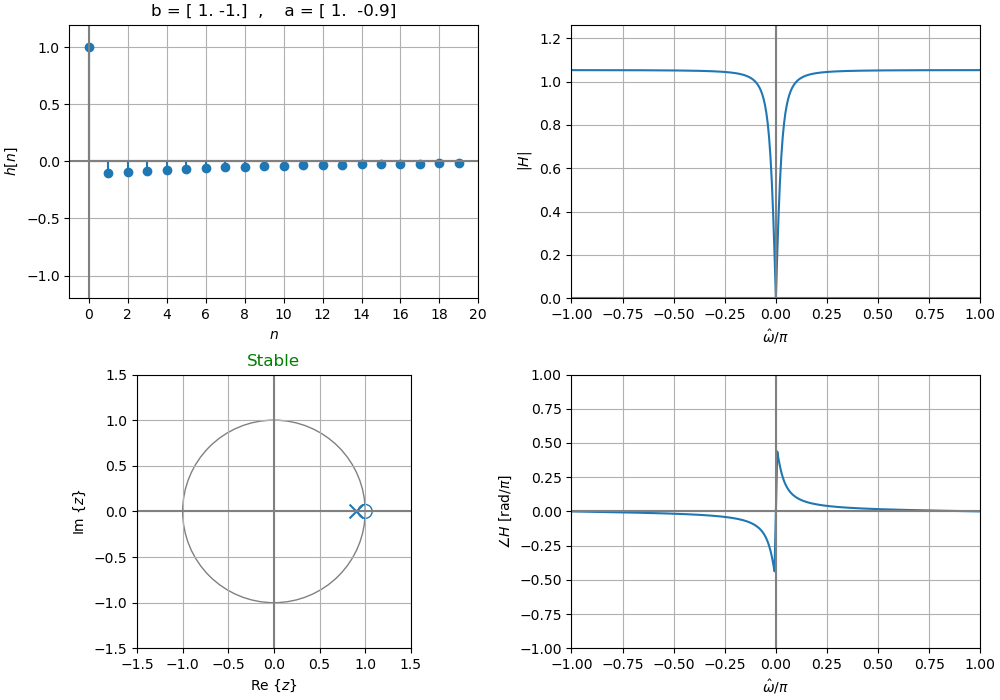

In [1]:
# Use Matplotlib backend that allows interactive operation
%matplotlib ipympl

# Modules
import numpy as np
from math import pi
import ipywidgets as widgets

# Filter calculation and plotting
import filter_response

#######################################################################################
#  Function that runs the demo interactively
def run_demo(n_z, n_p,
             include_0, r_0, theta_0,
             include_1, r_1, theta_1,
             include_2, r_2, theta_2,
             include_3, r_3, theta_3,
             include_4, r_4, theta_4,
             include_5, r_5, theta_5):
    
    zero_list = [False for k in range(n_z)]
    pole_list = [True for k in range(n_p)]
    pole = zero_list + pole_list

    # Must hard code single values due to Jupyter widgets limitation. Other solution possible?
    include = [include_0, include_1, include_2, include_3, include_4, include_5]
    r = [r_0, r_1, r_2, r_3, r_4, r_5]
    theta = [theta_0, theta_1, theta_2, theta_3, theta_4, theta_5]
    
    r = np.extract(include, r)
    theta = np.extract(include, theta)
    pole = np.extract(include, pole)

    # Set values
    filt.set_polar_roots(r, theta*pi, pole)
    filt.plot()
    
    return    

#######################################################################################
# Define widgets
w_layout = widgets.Layout(width='80%')
widget_style = {'description_width': 'initial'}

title_widget = widgets.Label("Pole-zero demo program", style=dict(font_weight='bold'))

label = ["Zeros", "Poles"]
label_widget = [widgets.Label(labeltext,
                              layout=widgets.Layout(width='80%'), 
                              style=dict(font_weight='bold')) 
                for labeltext in label]

n_z = 3    # Number of zeros (First n_z cvalues interpreted as zeros)
n_p = 3    # Number of poles
n = n_z + n_p

width  = '8%'

# Magnitude widgets
r = np.concatenate((np.ones(n_z), 0.9*np.ones(n_p)))
r_widget = [widgets.FloatText(min=0, max=4.0,  step=0.01, value=val, 
                                 description= " $r$ ", 
                                 format = '.2f',
                                 layout=widgets.Layout(width=width), 
                                 style=widget_style)
                 for val in r]


theta = np.concatenate((np.zeros(n_z), np.zeros(n_p)))
theta_widget = [widgets.FloatText(min=-2.0, max=2.0, step=0.01, value=val, 
                                      description=r" $\theta$ ", 
                                      readout_format = '.2f',
                                      layout=widgets.Layout(width=width),
                                      style=widget_style)
                    for val in theta]

include = [False for k in range(n_z + n_p)]
include[0] = include[n_z] = True
include_widget = [widgets.Checkbox(value=val, 
                                     description=' ',
                                     layout=widgets.Layout(width=width))
                    for val in include]

# Create lines of parameter widgets 
zeros_line = [widgets.HBox([ include_widget[k], r_widget[k], theta_widget[k]]) for k in range(n_z)]
zeros_grid = widgets.VBox([line for line in zeros_line])

poles_line = [widgets.HBox([include_widget[k], r_widget[k], theta_widget[k]]) for k in range(n_z, n_z+n_p)]
poles_grid = widgets.VBox([line for line in poles_line])

display(title_widget)

display(label_widget[0])
display(zeros_grid)

display(label_widget[1])
display(poles_grid)

filt = filter_response.FilterResponse()

# Call display function interactively
w = widgets.interactive(run_demo, n_z=n_z, n_p=n_p,
                        include_0=include_widget[0], r_0=r_widget[0], theta_0=theta_widget[0],
                        include_1=include_widget[1], r_1=r_widget[1], theta_1=theta_widget[1],
                        include_2=include_widget[2], r_2=r_widget[2], theta_2=theta_widget[2],
                        include_3=include_widget[3], r_3=r_widget[3], theta_3=theta_widget[3],
                        include_4=include_widget[4], r_4=r_widget[4], theta_4=theta_widget[4],
                        include_5=include_widget[5], r_5=r_widget[5], theta_5=theta_widget[5])